# Introduction and Background

Through this analysis of NBA player’s statistics, we hope to answer to following questions: Can we accurately predict how many seasons it takes for an NBA rookie shooting guard to reach his prime? Will he breakout? Can we predict how long their career will last in the league? We believe that drawing from the stats of points (PTS), rebounds (REB), assists (AST), steals (STL), blocks (BLK), field goals attempted (FGA), field goals made (FGM), free throws attempted (FTA), free throws made (FTM), turnovers (TO), and minutes played, we will be able to create a performance rating that will lead us to conclude that rookies will take 4-6 years to breakout and reach their prime. We will also take the team that they are drafted to into account. 
 
This question is of interest because it will help us better speculate what players to keep an eye on, and whether NBA rookie statistics can be extrapolated to analyze when a rookie will breakout. Personal background includes our experience as fans of the sport and our support for the NBA. We have watched over five seasons of basketball, and in doing so have seen players mature from their rookie seasons to their primes. Additionally, we have absorbed knowledge from analysts and other sports media that make us believe that we can make an accurate prediction on how long it will take a rookie to reach his prime after 4-6 years of being in the league. 


# Data Description

We will be drawing our data from a csv file from data.world.

NBAPlayerPPG.xlsx - raw set with all per game stats for every player from 1991 to 2016 season. This dataset was taken off of the official nba site and added to dataworld.



Below are brief descriptions as to what statistics we chose to analyze and why.



Age: We want to study the age at which the player will break out.

PTS: One of the three main duties of an NBA guard. Points win games.

AST: One of the three main duties of an NBA guard. A guard’s role is to distribute the ball to his teammates.

STL: One of the three main duties of an NBA guard. Steals indicate exemplary defensive skills.

TO: Turnovers are a detriment to the team. More turnovers means less ball control, a necessity for a guard.

Minutes Played: We want to analyze players who are on the court. A player can’t break out if he’s on the bench all the time.

FGA and FGM: A guard needs to shooting the ball!



# Data Cleaning & Pre-Processing

We are only utilizing one dataset, but there are many irrelevant columns that we do not need to calculate a new efficiency rating. Our data appears to  be clean, but we must make sure to drop all NaN values and clean duplicates from the dataset. Duplicates will be deleted if two players appear in the same year.

In [1]:
#imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import *
from pylab import *

In [2]:
#import csv files
dfData = pd.read_csv('NBAPlayerPPG.csv')

In [3]:
#NBAPlayerPPG cleaning

#We only want some of the columns
dfData = dfData[['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'FG', '3P', '2P', 'FT', 'AST', 'STL', 'PS/G']]

#In the "Pos" column, drop the player if the position isn't 'SG' or 'PG'
dfData= dfData[(dfData['Pos'] == 'SG') | (dfData['Pos'] == 'PG')]

#Drop any duplicate players in the same year
dfData = dfData.drop_duplicates(['Year', 'Player'], keep='first')

#Print
dfData

,Year,Player,Pos,Age,Tm,G,MP,FG,3P,2P,FT,AST,STL,PS/G
1,2016,Jordan Adams,SG,21.00,MEM,2.00,7.50,1.00,0.00,1.00,1.50,1.50,1.50,3.50
3,2016,Arron Afflalo,SG,30.00,NYK,71.00,33.40,5.00,1.30,3.70,1.50,2.00,0.40,12.80
9,2016,Tony Allen,SG,34.00,MEM,64.00,25.30,3.40,0.20,3.10,1.40,1.10,1.70,8.40
15,2016,Alan Anderson,SG,33.00,WAS,13.00,14.80,1.60,0.90,0.70,0.80,1.10,0.30,5.00
16,2016,James Anderson,SG,26.00,SAC,51.00,14.10,1.30,0.50,0.90,0.40,0.80,0.40,3.50
20,2016,Giannis Antetokounmpo,PG,21.00,MIL,80.00,35.30,6.40,0.40,6.10,3.70,4.30,1.20,16.90
24,2016,Keith Appling,PG,23.00,ORL,5.00,5.40,0.40,0.00,0.40,0.40,0.20,0.20,1.20
28,2016,D.J. Augustin,PG,28.00,TOT,62.00,19.00,2.40,1.10,1.30,1.70,3.20,0.60,7.50
34,2016,Leandro Barbosa,SG,33.00,GSW,68.00,15.90,2.50,0.60,1.90,0.80,1.20,0.60,6.40
35,2016,J.J. Barea,PG,31.00,DAL,74.00,22.50,4.30,1.40,2.90,1.00,4.10,0.40,10.90


We need to make sure all of our numerical values are floats and not strings. If we were to calculate the average of all players in the Year X, then a string would only concatenate the strings, not take the average of the numerical values.

We can then clean the data even further, and drop players who have played less than 25 games. Dropping these players would give us more accurate data of when a player would break out. Bench players may skew the data because they may or may not develop during their time in the NBA.

In [4]:
#convert to floats in order to properly merge rows
dfData['G'] = dfData['G'].astype('float64')
dfData['MP'] = dfData['MP'].astype('float64')
dfData['FG'] = dfData['FG'].astype('float64')
dfData['3P'] = dfData['3P'].astype('float64')
dfData['2P'] = dfData['2P'].astype('float64')
dfData['STL'] = dfData['STL'].astype('float64')
dfData['AST'] = dfData['AST'].astype('float64')
dfData['PS/G'] = dfData['PS/G'].astype('float64')


#rename columns to exclude numbers and other characters
dfData = dfData.rename(columns={'3P': 'ThreeP', '2P': 'TwoP'})
dfData = dfData.rename(columns={'PS/G': 'PPG'})

#Remove all players who played less than 25 games
dfData = dfData[dfData['G'] > 25]

#Calculate ER of each player
dfData['ER'] = (dfData.G + dfData.MP + dfData.FG + dfData.ThreeP + 
dfData.TwoP + dfData.AST + dfData.STL + dfData.STL + dfData.PPG)



By creating a deep copy of the dataframe, we create a completely new dataframe rather than a new dataframe referring to the old dfData. This allows us to continue to make changes to a dfData copy, while maintaining our original dfData.

In [5]:
#Create deep copy of dfData
dfDataCopy = dfData.copy(deep=True)

#Drop unneeded columns in the copy
dfDataCopy.drop(['Player', 'Pos', 'Age', 'Tm'], axis=1, inplace=True)


In [6]:
#Get the league average of every statistic
dfDataCopy = dfDataCopy.groupby(['Year']).mean()

#Print the copy
dfDataCopy

,G,MP,FG,ThreeP,TwoP,AST,STL,PPG,ER
Year,,,,,,,,,
1991,68.983740,24.116260,4.280488,0.404878,3.873984,3.845528,1.077236,11.105691,118.765041
1992,66.477273,23.250000,3.980303,0.381061,3.594697,3.601515,1.046970,10.220455,113.599242
1993,66.104000,24.138400,4.030400,0.503200,3.526400,3.720800,1.052000,10.574400,114.701600
1994,68.503937,24.029134,3.894488,0.518898,3.374016,3.578740,1.064567,10.183465,116.211811
1995,64.837209,24.180620,3.699225,0.858140,2.831783,3.585271,0.995349,10.186822,112.169767
1996,67.303704,24.226667,3.637778,0.945185,2.690370,3.434815,0.965926,10.199259,114.369630
1997,65.963504,24.194891,3.535036,0.990511,2.545985,3.257664,0.987591,9.914599,112.377372
1998,63.755245,23.333566,3.307692,0.687413,2.615385,3.127273,0.941259,9.018881,107.727972
1999,43.327586,25.332759,3.460345,0.785345,2.672414,3.346552,1.025862,9.481034,90.457759


# Data Visualization

Because we calculated the average effiency rating(ER) of every year from 1991 - 2016, we can visualize the data in the form of a scatter plot.

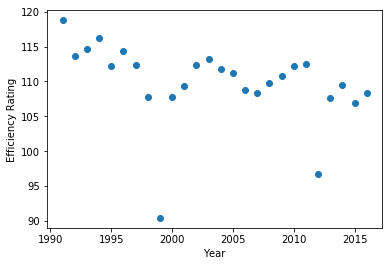

In [7]:
#Create scatterplot of average NBA effiency ratings and label accordingly
plt.scatter(dfDataCopy.index, dfDataCopy.ER)
plt.xlabel('Year')
plt.ylabel('Efficiency Rating')

We can see that the general trend is that player ER has gone down over the past 25 years.

Now we can visualize how Kobe Bryant's ER compared to others.

      Year       Player Pos    Age   Tm     G    MP   FG  ThreeP  TwoP    FT  \
658   2015  Kobe Bryant  SG  36.00  LAL  35.0  34.5  7.6     1.5   6.1  5.60   
1919  2013  Kobe Bryant  SG  34.00  LAL  78.0  38.6  9.5     1.7   7.8  6.70   
2483  2012  Kobe Bryant  SG  33.00  LAL  58.0  38.5  9.9     1.5   8.4  6.60   
3064  2011  Kobe Bryant  SG  32.00  LAL  82.0  33.9  9.0     1.4   7.6  5.90   
3674  2010  Kobe Bryant  SG  31.00  LAL  73.0  38.8  9.8     1.4   8.5  6.00   

      AST  STL   PPG     ER  
658   5.6  1.3  22.3  115.2  
1919  6.0  1.4  27.3  171.7  
2483  4.6  1.2  27.9  151.2  
3064  4.7  1.2  25.3  166.3  
3674  5.0  1.5  27.0  166.5  


(1996, 2016)

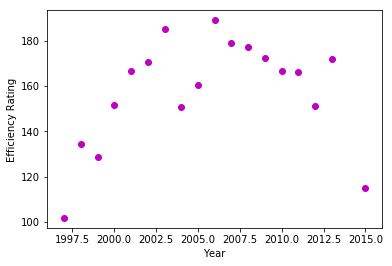

In [8]:
#assign Kobe Bryant to a variable
player_Name = ['Kobe Bryant']

#Retrieve all rows whose Player name is 'Kobe Bryant'
dfKobe = dfData[dfData.Player.isin(player_Name)]

#Print Kobe's stats recent 5 years
print(dfKobe.head())

#Plot Kobe's Stats
plt.scatter(dfKobe['Year'], dfKobe['ER'], color = 'm')
plt.xlabel('Year')
plt.ylabel('Efficiency Rating')

#Restrict the plot to years Kobe played, not the entire 1990-2016 duration
plt.xlim(1996, 2016)

Let's plot Kobe Bryant's ER vs. league average ER on the same graph.

(1996, 2016)

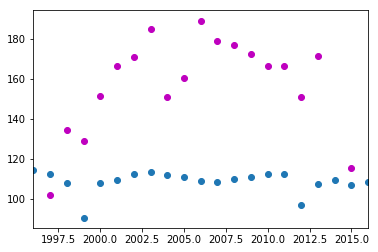

In [9]:
#Plot league average ER vs. Kobe Bryant ER
plt.scatter(dfDataCopy.index, dfDataCopy.ER)
plt.scatter(dfKobe.Year, dfKobe.ER, color = 'm')

#Restrict the plot to years Kobe played, not the entire 1990-2016 duration
plt.xlim(1996, 2016)

Creating a linear regression for Kobe's ER stats will allow us see the general trend of Kobe's stats throughout the years

In [10]:
# Comparison of simple linear regressions: kobes ER/year and player average ER/year 
p1 = np.polyfit(dfKobe.Year, dfKobe.ER, 1)

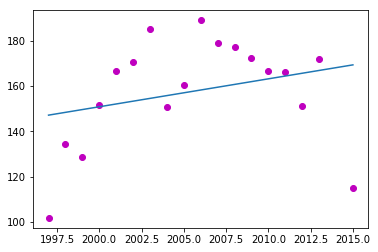

In [11]:
#Create a linear regression 
plt.plot(dfKobe.Year, dfKobe.ER, 'o', color = 'm')
plt.plot(dfKobe.Year, polyval(p1,dfKobe.Year))

A linear regression doesn't look it it makes sense. As a player gets older, a player's efficiency rating will NOT get better. Thus, a linear regression is a terrible predictor of ER. Try a quadratic regression instead.

In [12]:
p2 = np.polyfit(dfKobe.Year, dfKobe.ER, 2)

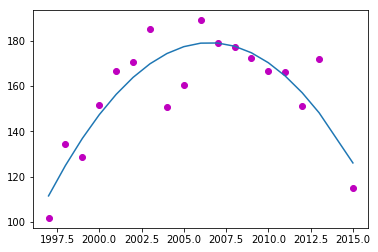

In [13]:
#Scatter plot of Kobe's stats
plt.plot(dfKobe.Year, dfKobe.ER, 'o', color = 'm')

#Create quadratic regression of Kobe's efficiency rating
plt.plot(dfKobe.Year, polyval(p2,dfKobe.Year))


A quadratic regression looks like a much better fit. From our knowledge of basketball, Kobe Bryant most definitely reached his prime in 2006. His ER falls off after that, which makes sense because of old age. 

We can try and see if a cubic regression will be a better fit.

In [14]:
p3 = np.polyfit(dfKobe.Year, dfKobe.ER, 3)

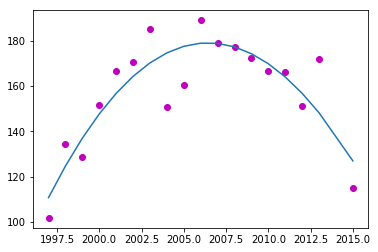

In [15]:
#Scatter plot of Kobe's stats
plt.plot(dfKobe.Year, dfKobe.ER, 'o', color = 'm')

#Create cubic regression of Kobe's efficiency rating
plt.plot(dfKobe.Year, polyval(p3,dfKobe.Year))

A cubic regression looks the same, so we can stick with the quadratic regression.

Let's analyze another player: Steve Nash. Did Steve Nash peak after 7 years just as Kobe did?

      Year      Player Pos    Age   Tm     G    MP   FG  ThreeP  TwoP    FT  \
2223  2013  Steve Nash  PG  38.00  LAL  50.0  32.5  4.7     1.1   3.6  2.10   
2786  2012  Steve Nash  PG  37.00  PHO  62.0  31.6  4.8     0.9   3.9  2.00   
3385  2011  Steve Nash  PG  36.00  PHO  75.0  33.3  5.3     1.1   4.2  3.00   
3991  2010  Steve Nash  PG  35.00  PHO  81.0  32.8  6.2     1.5   4.6  2.60   
4551  2009  Steve Nash  PG  34.00  PHO  74.0  33.6  5.8     1.5   4.3  2.60   

       AST  STL   PPG     ER  
2223   6.7  0.6  12.7  112.5  
2786  10.7  0.6  12.5  127.6  
3385  11.4  0.6  14.7  146.2  
3991  11.0  0.5  16.5  154.6  
4551   9.7  0.7  15.7  146.0  


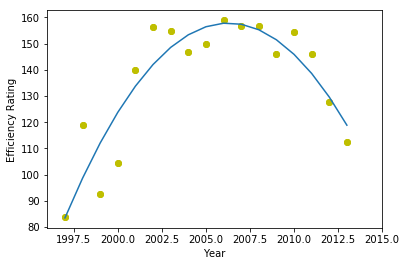

In [16]:
#assign Steve Nash to a variable
player_Name1 = ['Steve Nash']

#Retrieve all rows whose Player name is 'Steve Nash'
dfData[dfData.Player.isin(player_Name1)]

#Create a new df with Nash's stats throughout the years
dfNash = dfData[dfData.Player.isin(player_Name1)]

#print last 5 years
print(dfNash.head())

#Plot Nash's Stats
plt.scatter(dfNash.Year, dfNash.ER, color = 'y')
plt.xlabel('Year')
plt.ylabel('Efficiency Rating')

#Restrict the plot to years Nash played, not the entire 1990-2016 duration
plt.xlim(1996, 2015)

#Create polyfit of Nash
p2 = np.polyfit(dfNash.Year, dfNash.ER, 2)

#Scatter plot of Nash's
plt.plot(dfNash.Year, dfNash.ER, 'o', color = 'y')

#Create quadratic regression of Nash's efficiency rating
plt.plot(dfNash.Year, polyval(p2,dfNash.Year))

It looks like Nash did peak after 7 years. We can continue to utilize this test with many different players.

(1996, 2016)

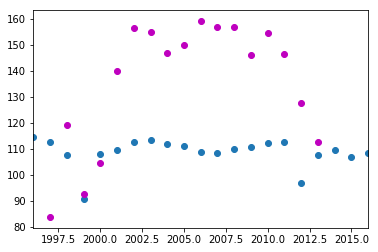

In [17]:
#Plot league average ER vs. Steve Nash ER
plt.scatter(dfDataCopy.index, dfDataCopy.ER)
plt.scatter(dfNash.Year, dfNash.ER, color = 'm')

#Restrict the plot to years Nash played, not the entire 1990-2016 duration
plt.xlim(1996, 2016)

      Year       Player Pos    Age   Tm     G    MP   FG  ThreeP  TwoP    FT  \
417   2016  Tony Parker  PG  33.00  SAS  72.0  27.5  4.9     0.4   4.5  1.80   
1023  2015  Tony Parker  PG  32.00  SAS  68.0  28.7  5.9     0.6   5.4  1.90   
1670  2014  Tony Parker  PG  31.00  SAS  68.0  29.4  6.7     0.4   6.3  2.90   
2245  2013  Tony Parker  PG  30.00  SAS  66.0  32.9  7.9     0.4   7.5  4.20   
2804  2012  Tony Parker  PG  29.00  SAS  60.0  32.1  7.1     0.2   6.9  3.80   

      AST  STL   PPG     ER  
417   5.3  0.8  11.9  128.1  
1023  4.9  0.6  14.4  129.1  
1670  5.7  0.5  16.7  134.2  
2245  7.6  0.8  20.3  144.2  
2804  7.7  1.0  18.3  134.3  


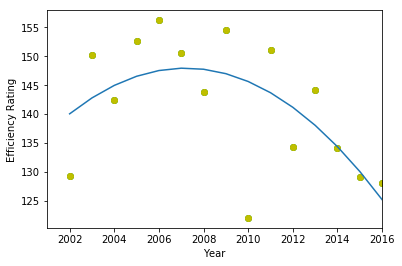

In [18]:
#assign Tony Parker to a variable
player_NameTP = ['Tony Parker']

#Retrieve all rows whose Player name is 'Tony Parker'
dfTP = dfData[dfData.Player.isin(player_NameTP)]

#print last 5 years
print(dfTP.head())

#Plot Parker's Stats
plt.scatter(dfTP.Year, dfTP.ER, color = 'g')
plt.xlabel('Year')
plt.ylabel('Efficiency Rating')

#Restrict the plot to years Tony Parker played, not the entire 1990-2016 duration
plt.xlim(2001, 2016)

#Create polyfit of Parker
p3 = np.polyfit(dfTP.Year, dfTP.ER, 2)

#Scatter plot of Parker
plt.plot(dfTP.Year, dfTP.ER, 'o', color = 'y')

#Create quadratic regression of Parker's efficiency rating
plt.plot(dfTP.Year, polyval(p3, dfTP.Year))

(2001, 2016)

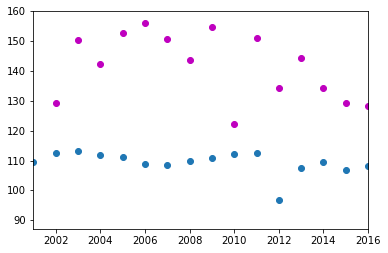

In [19]:
#Plot league average ER vs. Tony Parker ER
plt.scatter(dfDataCopy.index, dfDataCopy.ER)
plt.scatter(dfTP.Year, dfTP.ER, color = 'm')

#Restrict the plot to years Tony Parker played, not the entire 1990-2016 duration
plt.xlim(2001, 2016)

      Year        Player Pos    Age   Tm     G    MP   FG  ThreeP  TwoP    FT  \
562   2016  Lou Williams  SG  29.00  LAL  67.0  28.5  4.2     1.6   2.6  5.30   
1204  2015  Lou Williams  SG  28.00  TOR  80.0  25.2  4.7     1.9   2.8  4.30   
1825  2014  Lou Williams  PG  27.00  ATL  60.0  24.1  3.3     1.3   2.0  2.50   
2399  2013  Lou Williams  SG  26.00  ATL  39.0  28.7  4.8     1.8   2.9  2.70   
2942  2012  Lou Williams  PG  25.00  PHI  64.0  26.3  5.0     1.3   3.7  3.70   

      AST  STL   PPG     ER  
562   2.5  0.9  15.3  123.5  
1204  2.1  1.1  15.5  134.4  
1825  3.5  0.8  10.4  106.2  
2399  3.6  1.1  14.1   97.1  
2942  3.5  0.8  14.9  120.3  


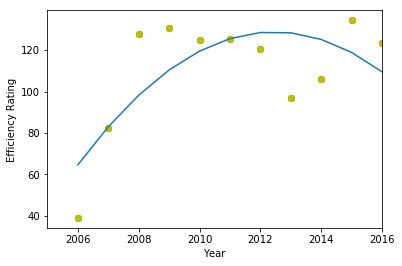

In [20]:
#assign Lou Williams to a variable
player_Name3 = ['Lou Williams']

#Retrieve all rows whose Player name is 'Lou Williams'
dfLW = dfData[dfData.Player.isin(player_Name3)]

#print last 5 years
print(dfLW.head())

#Plot Williams's Stats
plt.scatter(dfLW.Year, dfLW.ER, color = 'g')
plt.xlabel('Year')
plt.ylabel('Efficiency Rating')

#Restrict the plot to years Lou Williams played, not the entire 1990-2016 duration
plt.xlim(2005, 2016)

#Create polyfit of Williams
p3 = np.polyfit(dfLW.Year, dfLW.ER, 2)

#Scatter plot of Williams'
plt.plot(dfLW.Year, dfLW.ER, 'o', color = 'y')

#Create quadratic regression of Williams' efficiency rating
plt.plot(dfLW.Year, polyval(p3, dfLW.Year))


(2006, 2016)

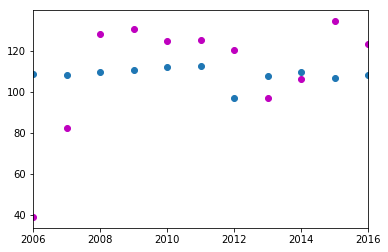

In [21]:
#Plot league average ER vs. Lou Williams ER
plt.scatter(dfDataCopy.index, dfDataCopy.ER)
plt.scatter(dfLW.Year, dfLW.ER, color = 'm')

#Restrict the plot to the past 10 years
plt.xlim(2006, 2016)

      Year       Player Pos    Age   Tm     G    MP   FG  ThreeP  TwoP    FT  \
182   2016  Eric Gordon  SG  27.00  NOP  45.0  32.9  5.1     2.5   2.6  2.50   
802   2015  Eric Gordon  SG  26.00  NOP  61.0  33.1  4.7     2.3   2.4  1.80   
1458  2014  Eric Gordon  SG  25.00  NOP  64.0  32.1  5.6     1.6   4.0  2.70   
2030  2013  Eric Gordon  SG  24.00  NOH  42.0  30.1  5.6     1.3   4.3  4.50   
3208  2011  Eric Gordon  SG  22.00  LAC  56.0  37.7  7.6     1.9   5.7  5.10   

      AST  STL   PPG     ER  
182   2.7  1.0  15.2  108.0  
802   3.8  0.8  13.4  122.3  
1458  3.3  1.2  15.4  128.4  
2030  3.3  1.1  17.0  105.8  
3208  4.4  1.3  22.3  138.2  


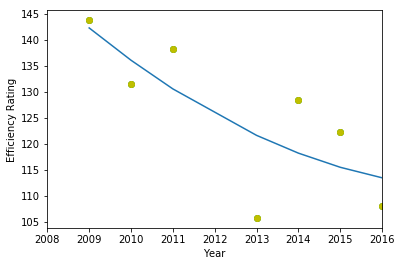

In [22]:
#assign Eric Gordon  to a variable
player_Name5 = ['Eric Gordon']

#Retrieve all rows whose Player name is 'Eric Gordon'
dfEG = dfData[dfData.Player.isin(player_Name5)]

#print last 5 years
print(dfEG.head())

#Plot Gordon's Stats
plt.scatter(dfEG.Year, dfEG.ER, color = 'g')
plt.xlabel('Year')
plt.ylabel('Efficiency Rating')

#Restrict the plot to years Gordon played, not the entire 1990-2016 duration
plt.xlim(2008, 2016)

#Create polyfit of Gordon
p5 = np.polyfit(dfEG.Year, dfEG.ER, 2)

#Scatter plot of Gordon's ER
plt.plot(dfEG.Year, dfEG.ER, 'o', color = 'y')

#Create quadratic regression of Gordon's efficiency rating
plt.plot(dfEG.Year, polyval(p5, dfEG.Year))

(2006, 2016)

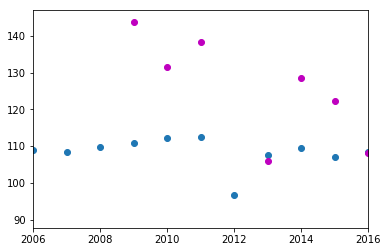

In [23]:
#Plot league average ER vs. Eric Gordon ER
plt.scatter(dfDataCopy.index, dfDataCopy.ER)
plt.scatter(dfEG.Year, dfEG.ER, color = 'm')

#Restrict the plot to the past 10 years
plt.xlim(2006, 2016)

      Year     Player Pos    Age   Tm     G    MP   FG  ThreeP  TwoP    FT  \
543   2016  John Wall  PG  25.00  WAS  77.0  36.2  7.4     1.5   5.9  3.50   
1186  2015  John Wall  PG  24.00  WAS  79.0  35.9  6.6     0.8   5.7  3.60   
1809  2014  John Wall  PG  23.00  WAS  82.0  36.3  7.1     1.3   5.7  3.90   
2378  2013  John Wall  PG  22.00  WAS  49.0  32.7  6.6     0.2   6.4  5.00   
2918  2012  John Wall  PG  21.00  WAS  66.0  36.2  5.7     0.0   5.7  4.80   

       AST  STL   PPG     ER  
543   10.2  1.9  19.9  161.9  
1186  10.0  1.7  17.6  159.0  
1809   8.8  1.8  19.3  164.1  
2378   7.6  1.3  18.5  123.6  
2918   8.0  1.4  16.3  140.7  


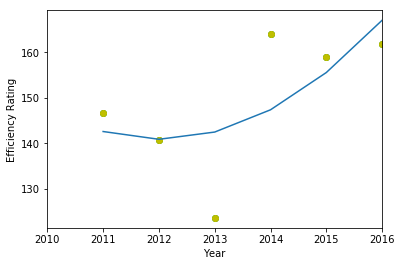

In [24]:
#assign John Wall  to a variable
player_NameJW = ['John Wall']

#Retrieve all rows whose Player name is 'John Wall'
dfJW = dfData[dfData.Player.isin(player_NameJW)]

#print last 5 years
print(dfJW.head())

#Plot Wall's Stats
plt.scatter(dfJW.Year, dfJW.ER, color = 'g')
plt.xlabel('Year')
plt.ylabel('Efficiency Rating')

#Restrict the plot to years Wall played, not the entire 1990-2016 duration
plt.xlim(2010, 2016)

#Create polyfit of Wall
p8 = np.polyfit(dfJW.Year, dfJW.ER, 2)

#Scatter plot of Wall
plt.plot(dfJW.Year, dfJW.ER, 'o', color = 'y')

#Create quadratic regression of Wall's efficiency rating
plt.plot(dfJW.Year, polyval(p8, dfJW.Year))

(2006, 2016)

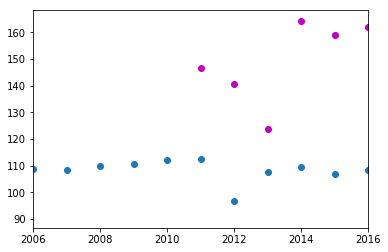

In [25]:
#Plot league average ER vs. John Wall's ER
plt.scatter(dfDataCopy.index, dfDataCopy.ER)
plt.scatter(dfJW.Year, dfJW.ER, color = 'm')

#Restrict the plot to the past 10 years
plt.xlim(2006, 2016)

# Data Analysis and Results

After inputting the data and obtaining an efficiency rating for each player for each year, we were able to calculate an average efficiency rating for each season. From this, we see that each year, the average efficiency rating hovers around 115 with a standard deviation of about 30. This high standard deviation was expected do to the obvious skill differences between some of the league's best players and its worst players. Our research technique aimed to fit our efficiency rating to a regression analysis that showed data correlation in multiple players, and matched expectations about timing of All-Star player breakout.

Kobe, Nash, and Parker had steep historic breakouts that our resulting data corroborates. Compared to per year league averages of efficiency, these high performing players broke out even if they had higher efficiency rating, than league averages, from the start. Tony Parker started out with an efficiency rating of 140, which far higher than league averages that sit between 100 and 120, and still showed a personal breakout that lead to peak performance during his first 6 years in the league according to our rating algorithm. However, this quick improvement from the start also stems from the fact that Parker played in the Euro league before entering the NBA, but this still does not take away from Parker's peak occurring about 5 years after he started playing basketball professionally, which is also the mark of the beginning of his championship runs with the Spurs.

In comparison to those great players, some current players such as, Lou Williams, Eric Gordon, and John Wall can be analyzed by looking at their stats for the time they have been in the league. They have gathered enough playing time, over five seasons at least, to show their progression throughout the years. For instance, Lou Williams started the league slowly but progressed to rise above the league average ER and has been steadily playing at that level in the past five years. Another example is his current teammate, Eric Gordon, who entered the league in 2008. The regression model seen is opposite to Lou Williams, as Eric Gordon's rookie years were about 20 points above the league average for efficiency rating (ER), but the later years show otherwise. His level of stellar play does not translate in his next four years of his career, which his ER is similar to the league average. A great comparison of the model to show how a superstar is on the rise is seen with John Wall. Given that his data only ranges for about six years, the quadratic regression models shows he is soon to be, or currently playing in his prime by having spectacular numbers that are way above the league average ER. 

The resultant data gathered and displayed on our linear, cubic, and quadratic regression lines shows a bell-shaped curve of efficiency rating throughout the player's NBA career. Our quadratic regression displays break-out and drop off trends of players as they age in the league. The regression of All-Star guards Kobe Bryant and Steve Nash shows an even more distinct regression curve that has a visibly strong break-out, based on our efficiency algorithm, and prolonged prime years of play. The qualitative data of historic breakout in these All-Star players, was matched by our quantitative data research shown in the regression curve. Each player that was analyzed showed some increase in efficiency rating upon onset of their first NBA season. Each player that was analyzed also showed some peak performance that fell between 4 and 10 years. This supports our hypothesis stating observable player breakout after 4 years.

In addition, we matched this with regressions of other young players that have been in the league less than 5 years to be compared to the first 5 years of Kobe and Nash. Lou Williams showed a definite breakout over a period of six years, with very steep initial spike in performance in his first two years of play. Regression analysis shows an early breakout, relative to average players in the league, for Lou after just his first two years.


# Conclusion/Discussion

Our data was obtained from an official NBA source that provides us with a high confidence in data accuracy. Though we were successfully able to show a steep climb in NBA rookies early on, we also recognize that our efficiency rating algorithm has confounds implicit to it's design. Our research frame, that is based on famously high performing NBA guards, may have minimal bias in player choice of Kobe Bryant and Steve Nash. However, they are indisputably high performing athletes that are historically attributed with steep rookie breakout performance so we chose those players specifically. The algorithm is based on accurate player data but there is much valid argument for which statistics are most important in performance. Our research design focused on evenly distributing weight among the positive player statistic values.

Some errors we ran into in our project were the multiple datasets, each with different statistics that are calculated differently. Thus we resorted to using the most useful dataset, 'NBAPlayerPPG.csv', which has all the statistics to calculate a simple model. A confound that can be said about our calculations, were using the league averages for each category when it does not account for the outliers which may be players that do not put a lot of stats up versus superstars that exceed those averages by a lot. Comparing the rookies was unfeasible because of the multiple dataset issue, but using linear regression models on Kobe Bryant, Tony Parker, and Steve Nash demonstrated to us the breakout in their career when our calculated efficiency rating (ER) exceeded the league average ER by far. Being able to visualize the progression of their careers gives us an understanding of how a player develops their game, and also a way to implement a predictive model for rookies and how their beginning years compared to very accomplished players. Further improvements to this project would include the use of NBA Rookie Data as intended in the proposal, to project their careers based on the performance in their first five years in the league.

Overall, our research data came from highly accurate sources, and all associated bias in design was minimal. We are happy to see regression data that matches our original hypothesis of a 4-6 year rookie breakout period. We also believe that current rookies will see a predictable breakout period in efficiency rating despite the many ways the NBA has changed in the last two decades. It is interesting to note that league average for our efficiency rating has shown a steady decrease since 1990. This may be attributable to a change in specific player statistic focus over the past two decades. Different statistics, such as those that track three point shooting, may have disproportionate weights in efficiency rating. Certain statistics may have more training focus in recent years, that may skew efficiency rating for those individual data variable types.